# Fig 2.09 

Numerical Simulation of a metabolic network

In [1]:
using DifferentialEquations
using Catalyst
using ModelingToolkit
using Plots
Plots.gr(lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
# Model building
net = @reaction_network begin
    3.0, ∅ --> A
    2.0, A --> B
    2.5, A + B --> C + D
    3.0, C --> ∅
    3.0, D --> ∅
end

Model ##ReactionSystem#257 with 5 equations
States (4):
  A(t)
  B(t)
  C(t)
  D(t)
Parameters (0):

In [4]:
odesys = convert(ODESystem, net)

Model ##ReactionSystem#257 with 4 equations
States (4):
  A(t)
  B(t)
  C(t)
  D(t)
Parameters (0):

In [5]:
speciesmap(net)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 4 entries:
  B(t) => 2
  A(t) => 1
  C(t) => 3
  D(t) => 4

In [6]:
u0 = zeros(4)
tend = 10.0
sol = solve(ODEProblem(net, u0, tend))

retcode: Success
Interpolation: automatic order switching interpolation
t: 30-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.011099999999999997
  0.03416738935703762
  0.06493821924885028
  0.1012934199992325
  0.14525433637251192
  0.1981966546957134
  0.2628662838587544
  0.341974143511255
  0.4408076884404768
  0.5771314686420985
  ⋮
  1.830014671103413
  2.197707162483783
  2.5929224915179367
  3.0709879982662214
  3.6350045228986136
  4.345025617959607
  5.23647341986066
  6.330694531187695
  7.484380148952406
  8.528825781355344
  9.4477579039105
 10.0
u: 30-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [0.00029997000199933764, 2.999799953754866e-8, 5.623912546644786e-16, 5.623912546644786e-16]
 [0.003296372652316679, 3.627331236355826e-6, 8.21805646090172e-12, 8.21805646090172e-12]
 [0.0329330063952576, 0.00036682535223159706, 8.356768013816546e-8, 8.356768013816546e-8]
 [0.09907115088224092, 0.0034163858957268803, 7.16703271830343e-6

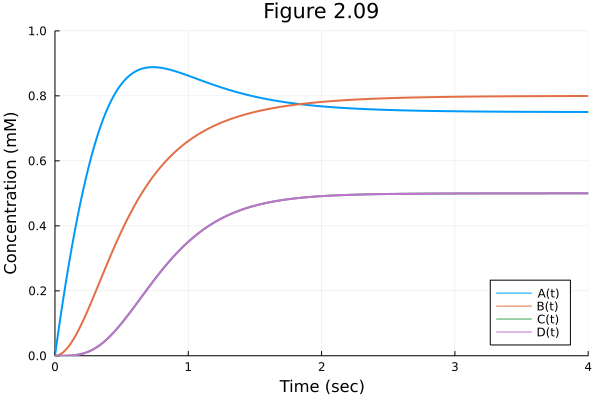

In [7]:
plot(sol, xlims=(0.0, 4.0), ylims=(0.0, 1.0), 
     xlabel="Time (sec)", ylabel="Concentration (mM)", title="Figure 2.09",
     legend=:bottomright)